## Import Packages

In [1]:
import pandas as pd
import pandas_ta
import statsmodels.api as sm
from pandas_datareader import data as wb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

from datetime import timedelta
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## DataSet

In [2]:
ticker = 'SPY'
data = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')

data.reset_index(inplace=True)           

In [3]:
#Summary Statistics
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-01-03,142.860001,140.570007,142.250000,141.369995,94807600.0,105.446762
1,2007-01-04,142.050003,140.610001,141.229996,141.669998,69620600.0,105.670479
2,2007-01-05,141.399994,140.380005,141.330002,140.539993,76645300.0,104.827637
3,2007-01-08,141.410004,140.250000,140.820007,141.190002,71655000.0,105.312469
4,2007-01-09,141.600006,140.399994,141.309998,141.070007,75680100.0,105.222977


In [4]:
data.set_index(pd.DatetimeIndex(data['Date']), inplace=True)
df = data[['Adj Close']]
df.reset_index(inplace=True) 

df

,Date,Adj Close
0,2007-01-03,105.446762
1,2007-01-04,105.670479
2,2007-01-05,104.827637
3,2007-01-08,105.312469
4,2007-01-09,105.222977
...,...,...
3756,2021-12-02,457.399994
3757,2021-12-03,453.420013
3758,2021-12-06,458.790009
3759,2021-12-07,468.279999


## Plot Adj Close

In [5]:
date_index = [0,500,1000,1500,2000,2500,3000,3500]
date_list = pd.to_datetime(df.loc[date_index]['Date']).dt.date.tolist()

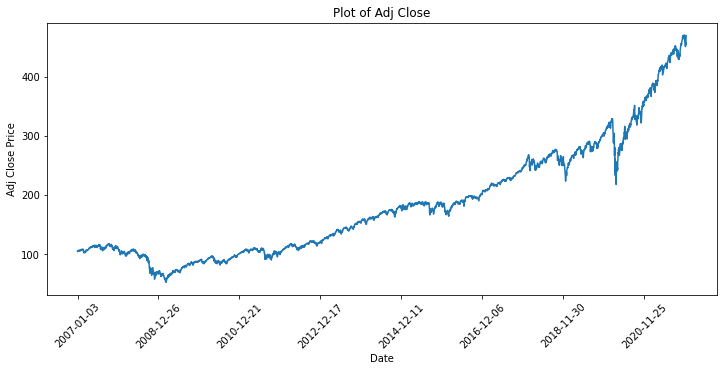

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Adj Close'])
plt.xticks(ticks=date_index, labels=date_list, rotation=45)
plt.title('Plot of Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

## Adding Technical Indicators

I will be adding the technical indicator EMA_10 which will be the exponential moving average calculated over a 5 day period.

In [9]:
df.ta.ema(close='Adj_Close',length = 10,append=True)
#Inspect the data once again

[X] Ooops!!! It's True, the series 'Adj_Close' was not found in Date, Adj Close, EMA_10


,Date,Adj Close,EMA_10
0,2007-01-03,105.446762,NaN
1,2007-01-04,105.670479,NaN
2,2007-01-05,104.827637,NaN
3,2007-01-08,105.312469,NaN
4,2007-01-09,105.222977,NaN
...,...,...,...
3756,2021-12-02,457.399994,460.786017
3757,2021-12-03,453.420013,459.446743
3758,2021-12-06,458.790009,459.327337
3759,2021-12-07,468.279999,460.955094


In [59]:
df.ta.bbands(close='Adj_Close',length = 10,append=True)

[X] Ooops!!! It's True, the series 'Adj_Close' was not found in Date, Adj Close, EMA_10, RSI_10, BBL_10_2.0, BBM_10_2.0, BBU_10_2.0, BBB_10_2.0, BBP_10_2.0


,Date,Adj Close,EMA_10,RSI_10,BBL_10_2.0,BBM_10_2.0,BBU_10_2.0,BBB_10_2.0,BBP_10_2.0
19,2007-01-31,107.221954,106.435714,61.405977,NaN,NaN,NaN,NaN,NaN
20,2007-02-01,107.863457,106.695303,68.405266,NaN,NaN,NaN,NaN,NaN
21,2007-02-02,108.012581,106.934808,69.819021,NaN,NaN,NaN,NaN,NaN
22,2007-02-05,108.042450,107.136198,70.116613,NaN,NaN,NaN,NaN,NaN
23,2007-02-06,108.072289,107.306396,70.440135,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3756,2021-12-02,457.399994,460.786017,43.898670,449.955306,463.085004,476.214701,5.670535,0.283506
3757,2021-12-03,453.420013,459.446743,39.403751,447.983641,461.454004,474.924367,5.838226,0.201790
3758,2021-12-06,458.790009,459.327337,47.467693,447.870566,460.444003,473.017441,5.461440,0.434227
3759,2021-12-07,468.279999,460.955094,58.350894,447.774503,460.515002,473.255502,5.533153,0.804737


In [60]:
df= df.dropna()
df

,Date,Adj Close,EMA_10,RSI_10,BBL_10_2.0,BBM_10_2.0,BBU_10_2.0,BBB_10_2.0,BBP_10_2.0
28,2007-02-13,107.900734,107.543351,58.481007,106.957226,107.795551,108.633875,1.555397,0.562734
29,2007-02-14,108.609322,107.737164,65.651644,107.063035,107.934287,108.805540,1.614413,0.887393
30,2007-02-15,108.751030,107.921503,66.921111,107.026857,108.023045,109.019232,1.844399,0.865386
31,2007-02-16,108.698830,108.062835,65.923886,107.016410,108.091669,109.166929,1.989533,0.782332
32,2007-02-20,108.930046,108.220510,68.252226,106.995165,108.180429,109.365693,2.191273,0.816224
...,...,...,...,...,...,...,...,...,...
3756,2021-12-02,457.399994,460.786017,43.898670,449.955306,463.085004,476.214701,5.670535,0.283506
3757,2021-12-03,453.420013,459.446743,39.403751,447.983641,461.454004,474.924367,5.838226,0.201790
3758,2021-12-06,458.790009,459.327337,47.467693,447.870566,460.444003,473.017441,5.461440,0.434227
3759,2021-12-07,468.279999,460.955094,58.350894,447.774503,460.515002,473.255502,5.533153,0.804737


### Plotting the EMA_10 Alongside the adj_close

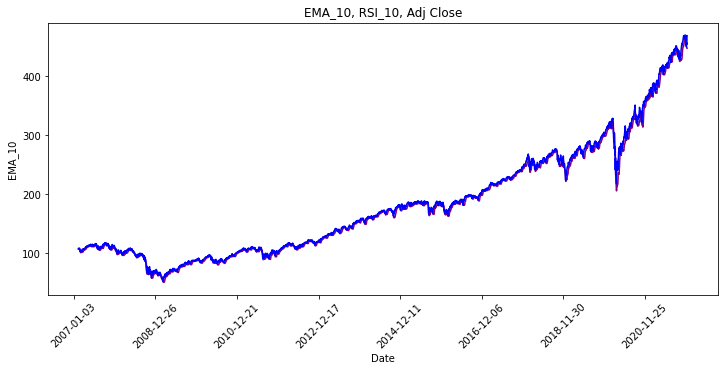

In [61]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['EMA_10'],label = "EMA_10",color = "pink")
plt.plot(df.index, df['BBL_10_2.0'],label = "RSI_10",color = "purple")
plt.plot(df.index, df['Adj Close'],label = "Adj Close",color = "blue",linestyle="-")


plt.xticks(ticks=date_index, labels=date_list, rotation=45)
plt.title('EMA_10, RSI_10, Adj Close')
plt.xlabel('Date')
plt.ylabel('EMA_10')
plt.show()

## Linear Regression

The goal for this program is to be able to predict and determine the stock market price.

Linear regression helps identitfy the relationships between a dependent variable and one or more independent variables. It is used to predict some sort of outcome according to a feature. 

In this algorithm, the features that will be selected is a technical indicator called EMA (Exponential Moving Average)


### Technical Indicators:
They are calculated values that describe movements in the historic pricing data such as stocks,these are used by investors to best determine whether they should buy,sell,or hold a stock.

#### Exponential Moving Average
The predictor variable I will be using for the linear regression.
The EMA is a type of moving average that places a greater weight on the most recent data points so they are more reactive to the latest price changes.


### Independent Variables

The independent variables are the RSI and EMA.

### Dependent Variables

The dependent variable is going to be what we are trying to predict which is going to be the price.


## Training the Model

### Test_Train Split

This is where will be dividing two sets of data, the first will be the training data and the testing data. 

In this model 80% will be used for training and the remaining 20% will be used for testing.

In [62]:

X=df[['EMA_10','BBL_10_2.0']]
y=df['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)


In [63]:
logreg = LinearRegression()

In [64]:
logreg.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = logreg.predict(X_test)

## Printout relevant metrics


In [66]:
print("Model Coefficients:", logreg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [0.88184623 0.12568235]
Mean Absolute Error: 1.894772639070098
Coefficient of Determination: 0.9990141327377514


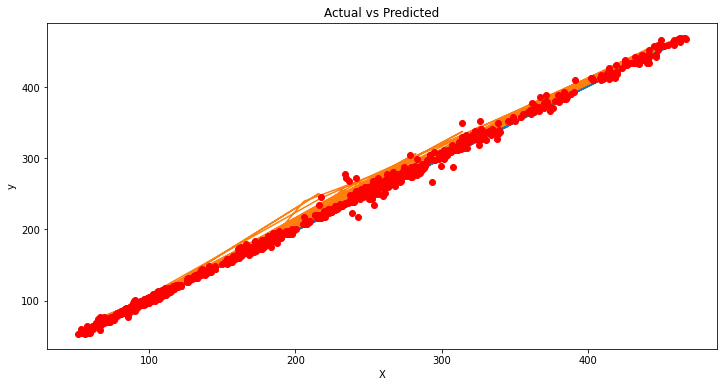

In [67]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_pred)     # regression line
plt.plot(X_test, y_test, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [68]:
print(f'alpha = {logreg.intercept_}')
print(f'betas = {logreg.coef_}')

alpha = -0.41807146984859855
betas = [0.88184623 0.12568235]


In [70]:
Based off the data that can

array([412.65856379])

array([413.63970873])